# Lab 4: Reshaping Data




In [ ]:
install.packages("babynames")
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(babynames)
library(nycflights13)

## Reshaping Data


Today, we'll focus on two functions used to reshape data, `pivot_wider` and `pivot_longer`. As their names suggest, `pivot_wider` reshapes data to be in a wider format (reduces rows and adds columns) and `pivot_longer` reshapes data to be in a longer format (reduces columns and adds rows).

 ### Pivoting to Longer Data
`pivot_longer` has three key arguments:
1. `cols`
2. `names_to`
3. `values_to`

`cols` should be set of columns in the original dataframe. The names of these columns will become values in a column in the new dataframe. The name of this new column is set with the `names_to` parameter. The values of the columns set in the `cols` parameter become the values in a new column, which will have the name set in the `values_to` parameter.

Confused? Here's an example! Let's say we have 3 students: A, B, and C. For each student, we have their age, their score on the first exam, and their score on the second exam.

In [ ]:
df <- tibble(student = c("A", "B", "C"),
                 age = c(10, 11, 10),
                 test_1 = c(99, 90, 93),
                 test_2 = c(89, 97, 92))

df

student,age,test_1,test_2
<chr>,<dbl>,<dbl>,<dbl>
A,10,99,89
B,11,90,97
C,10,93,92


Let's say we would like to plot test scores against age, where the points are colored by test number. In order to do this, it is more convenient to have a table with a column for test number. We can do this with `pivot_longer`:

In [ ]:
df %>%
  pivot_longer(cols = c(test_1, test_2),
              names_to = "test",
              values_to = "score")

student,age,test,score
<chr>,<dbl>,<chr>,<dbl>
A,10,test_1,99
A,10,test_2,89
B,11,test_1,90
B,11,test_2,97
C,10,test_1,93
C,10,test_2,92


Note that we set `names_to` and `values_to` to two columns that don't exist in our original data frame! These set the names of the new columns in our new dataframe. The `cols` argument determines what values go in those new columns.

Notice that the values in our `test` column are `test_1` and `test_2`, since those were the names of our original columns. This is a bit annoying!

In this example, we probably would want just a 1 or 2. We can use the `names_prefix` argument to deal with this:

In [ ]:
df %>%
  pivot_longer(cols = c(test_1, test_2),
              names_to = "test",
              values_to = "score",
              names_prefix = "test_")

student,age,test,score
<chr>,<dbl>,<chr>,<dbl>
A,10,1,99
A,10,2,89
B,11,1,90
B,11,2,97
C,10,1,93
C,10,2,92


What if the column names contain information that should be pivoted into multiple columns, instead of just one?

Let's look at another made up dataset of student test scores. Here, each row represents a year, and the columns store the average test score for each gender and grade, separated by an underscore.

For example, the `f_6` column contains the average test score for girls in 6th grade.  To deal with this, we have to set the `names_sep = "_"` argument since underscores separate the different pieces of information in the column names.

In [ ]:
df2 <- tibble(year = c("2021", "2020", "2019", "2018"),
                  f_6 = c(89, 85, 90, 91),
                  f_7 = c(88, 86, 91, 93),
                  f_8 = c(90, 84, 92, 92),
                  m_6 = c(89, 86, 90, 90),
                  m_7 = c(88, 87, 92, 89),
                  m_8 = c(91, 84, 92, 91))

df2

year,f_6,f_7,f_8,m_6,m_7,m_8
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021,89,88,90,89,88,91
2020,85,86,84,86,87,84
2019,90,91,92,90,92,92
2018,91,93,92,90,89,91


In [ ]:
df2 %>%
  pivot_longer(cols = !year,
               names_to = c("sex", "grade"),
               names_sep = "_",
               values_to = "score")

year,sex,grade,score
<chr>,<chr>,<chr>,<dbl>
2021,f,6,89
2021,f,7,88
2021,f,8,90
2021,m,6,89
2021,m,7,88
2021,m,8,91
2020,f,6,85
2020,f,7,86
2020,f,8,84


Instead of `names_sep`, we can use a related `pivot_longer()` argument, `names_pattern`. `names_pattern` is more flexible than `names_sep` because it allows regular expression groups, a powerful tool to manupulate text strings, matching each group with a variable from `names_to`. The future lectures will discuss regular expressions.

In [ ]:
df2 %>%
  pivot_longer(cols = !year,
               names_to = c("sex", "grade"),
               names_pattern = "(f|m)_(\\d+)",
               values_to = "score")

year,sex,grade,score
<chr>,<chr>,<chr>,<dbl>
2021,f,6,89
2021,f,7,88
2021,f,8,90
2021,m,6,89
2021,m,7,88
2021,m,8,91
2020,f,6,85
2020,f,7,86
2020,f,8,84


Since the column names start with either `f` or `m` then `-` and numeric numbers after that, the regular expression for this text pattern is `(f|m)_(\\d+)`. Each '()' specifics a group to match with an element in `names_to` vectors. Here there are two `()` for `c("sex", "grade")`.

### Pivoting to Wider Data

`pivot_wider` has two main arguments: `names_from` and `values_from`. Both of these parameters should be the names of columns in the original data frame. `names_from` should be the columns to get the names of the new columns from, and `values_from` should be the columns holding the values of those new columns.

As an example, we can take our pivoted dataframe from earlier and turn it back into the original:

In [ ]:
df3 <- tibble(student = c("A", "A", "B", "B", "C", "C"),
                  age = c(10, 10, 11, 11, 10, 10),
                  test = c(1, 2, 1, 2, 1, 2),
                  score = c(99, 89, 90, 97, 93, 92))

df3

student,age,test,score
<chr>,<dbl>,<dbl>,<dbl>
A,10,1,99
A,10,2,89
B,11,1,90
B,11,2,97
C,10,1,93
C,10,2,92


In [ ]:
df3 %>%
  pivot_wider(names_from = test,
              values_from = score,
              names_prefix = "test_")

student,age,test_1,test_2
<chr>,<dbl>,<dbl>,<dbl>
A,10,99,89
B,11,90,97
C,10,93,92


We wanted our new column names to be "test_1" and "test_2". This information was stored in the "test" column, so we set `names_from = test` and `names_prefix = "test_"` so that the names of the columns are "test_1" and "test_2" and not "1" and "2". The values in the score column are the values we want in our new "test_1" and "test_2" columns, so we set `values_from = score`.

Note by default all the other columns (`student`, `age`) are included after `pivot_wider()`. You can exclude some of them out by using `id_cols` argument.

In [ ]:
df3 %>%
  pivot_wider(id_cols = !age,
              names_from = test,
              values_from = score,
              names_prefix = "test_")

student,test_1,test_2
<chr>,<dbl>,<dbl>
A,99,89
B,90,97
C,93,92


Next, we can also use pivot_wider() to create column names that combine values from multiple columns. Take the following dataset as an example.

In [ ]:
df4 <- tibble(student = c("Logan", "Logan", "Ryan", "Ryan", "Jordan", "Jordan"),
                  sex = c("M", "F", "M", "F", "M", "F"),
                  final_grade = c(99, 89, 90, 97, 93, 92))

df4

student,sex,final_grade
<chr>,<chr>,<dbl>
Logan,M,99
Logan,F,89
Ryan,M,90
Ryan,F,97
Jordan,M,93
Jordan,F,92


In [ ]:
df4 %>%
  pivot_wider(names_from = c(student, sex),
              values_from = final_grade)

Logan_M,Logan_F,Ryan_M,Ryan_F,Jordan_M,Jordan_F
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
99,89,90,97,93,92


### Exercises for `pivot_longer`

1. For the 5 carriers with the most flights in the `flights` dataset, create a scatterplot of number of flights by mean delay, colored by delay type (*arrival* or *departure*). To do this, you'll have to reshape the data so that delay type is a column.

In [ ]:
### YOUR ANSWER HERE


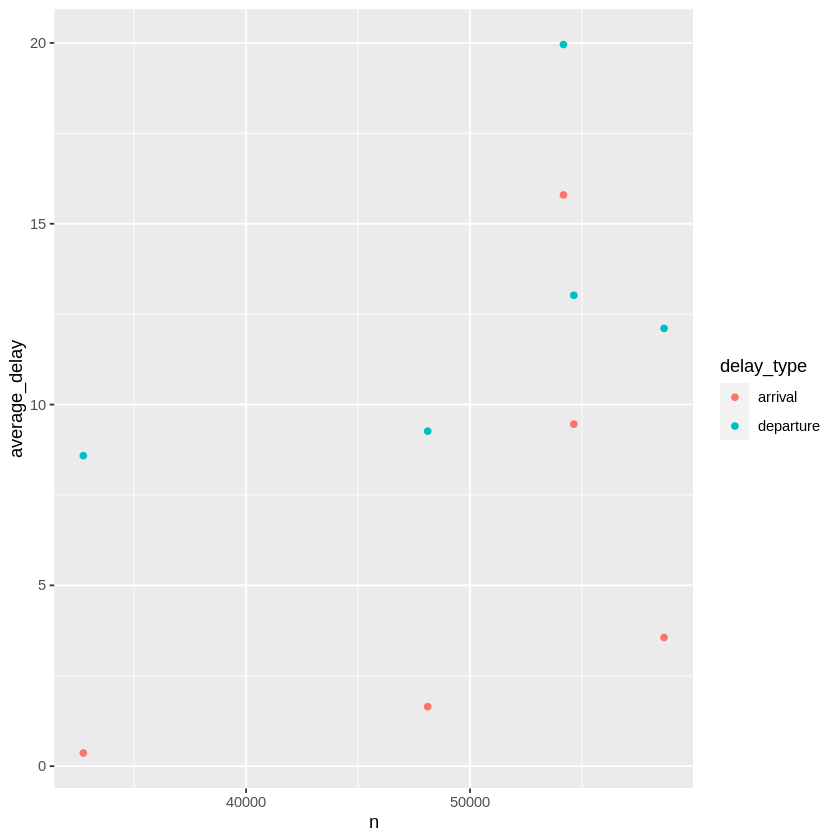

In [ ]:
### REFERENCE PLOT

2. Take a look at the `iris` dataset (you shouldn't need to load anything new). This dataset contains measurements of different flowers belonging to three species. The dataset has five columns: Species, Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width. Reshape this dataset so each row contains the following information: the species, the location of the measurement (sepal or petal), the type of measurement (length or width), and then the corresponding average measurement for flowers in that species.

Note: To separate columns names by the `.` character, you'll have to use `\\.` instead of `.` This is because `.` is a special character in R - you'll learn more about these when we cover regular expressions!

In [ ]:
### YOUR ANSWER HERE


In [ ]:
### REFERENCE TABLE

Species,location,measurement_type,measurement
<fct>,<chr>,<chr>,<dbl>
setosa,Sepal,Length,5.006
setosa,Sepal,Width,3.428
setosa,Petal,Length,1.462
setosa,Petal,Width,0.246
versicolor,Sepal,Length,5.936
versicolor,Sepal,Width,2.770
versicolor,Petal,Length,4.260
versicolor,Petal,Width,1.326
virginica,Sepal,Length,6.588


###Exercises for `pivot_wider`

3. How many popular gender neutral names are there in 2015? Reshape the `babynames` dataset so that each name is a row, and use that dataframe to find out how many names were given to at least 1,000 babies of each sex in 2015.

In [ ]:
### YOUR ANSWER HERE


In [ ]:
### REFERENCE TABLE

year,name,count_F,count_M
<dbl>,<chr>,<int>,<int>
2015,Avery,9339,2210
2015,Riley,5726,2086
2015,Peyton,3901,1377
2015,Emerson,1791,1201
2015,Hayden,1710,2732
2015,Finley,1601,1058
2015,Charlie,1557,1666
2015,Parker,1442,5404
2015,Sawyer,1219,4266


4. How does the number of Delta (DL) flights compare to the number of United (UA) flights on each day? Reshape the `flights` dataset so that each row has five columns (year, month, day, the number of Delta flights on that day, and the number of United flights on that day).

In [ ]:
### YOUR ANSWER HERE


In [ ]:
### REFERENCE TABLE (FIRST 6 ROWS)

`summarise()` has grouped output by 'year', 'month', 'day'. You can override
using the `.groups` argument.


year,month,day,num_flights_DL,num_flights_UA
<int>,<int>,<int>,<int>,<int>
2013,1,1,112,165
2013,1,2,152,170
2013,1,3,128,159
2013,1,4,125,161
2013,1,5,101,117
2013,1,6,114,137
